In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
sns.set(style="darkgrid")

rcParams['figure.figsize'] = 12,6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

**Call the data**

In [2]:
data_installment = pd.read_csv('installments_payments.csv')
data_cc_balance = pd.read_csv('credit_card_balance.csv')
data_prev_app = pd.read_csv('previous_application.csv')
data_pos = pd.read_csv('POS_CASH_balance.csv')
data_bureau_bal = pd.read_csv('bureau_balance.csv')
data_bureau = pd.read_csv('bureau.csv')
data_app_train = pd.read_csv('application_train.csv')
data_app_test = pd.read_csv('application_test.csv')
data_sample_sub = pd.read_csv('sample_submission.csv')
data_desc = pd.read_csv('HomeCredit_columns_description.csv')

# EDA

In [7]:
data_desc.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [27]:
data_bureau.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

In [16]:
data_desc[data_desc.Table == 'bureau.csv']

,Unnamed: 0,Table,Row,Description,Special
122,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
123,126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
124,127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
125,128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
126,129,bureau.csv,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
127,130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
128,131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
129,132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
130,133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN
131,134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...,NaN


In [35]:
data_bureau_bal.sample(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
25165098,6339165,-3,0
27132986,6592157,-4,C
22278386,6604074,-10,C
491199,5048190,-16,C
22170387,6304037,-88,C


In [34]:
data_desc[data_desc.Table == 'bureau_balance.csv']['Description'][141]

'Status of Credit Bureau loan during the month (active, closed, DPD0-30,� [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )'

**Insight From Bureau Data**

In [37]:
data_bureau['CREDIT_TYPE'].uniqueque()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

<AxesSubplot:xlabel='SK_ID_CURR', ylabel='CREDIT_TYPE'>

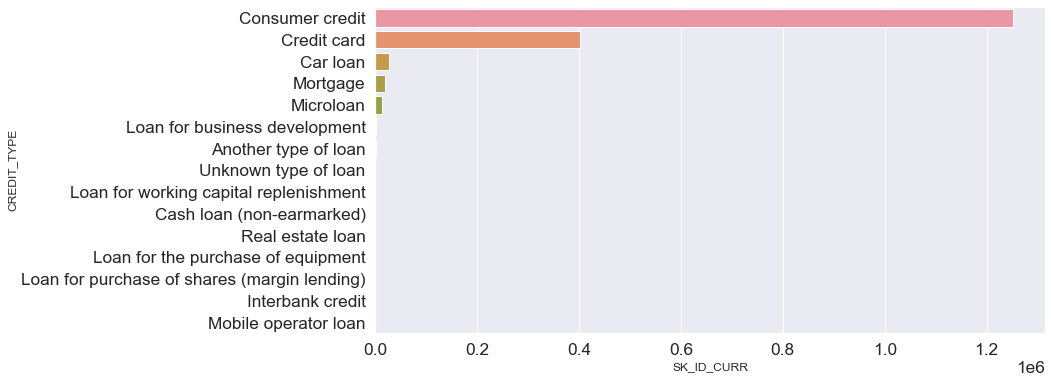

In [42]:
in_bu = data_bureau.groupby('CREDIT_TYPE').agg({'SK_ID_CURR':'count'}).reset_index()
in_bu = in_bu.sort_values('SK_ID_CURR', ascending=False)
sns.barplot(data=in_bu, x='SK_ID_CURR', y='CREDIT_TYPE')

In [43]:
in_bu

,CREDIT_TYPE,SK_ID_CURR
3,Consumer credit,1251615
4,Credit card,402195
1,Car loan,27690
12,Mortgage,18391
10,Microloan,12413
6,Loan for business development,1975
0,Another type of loan,1017
14,Unknown type of loan,555
9,Loan for working capital replenishment,469
2,Cash loan (non-earmarked),56


In [50]:
data_prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [53]:
data_pos.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   SK_ID_PREV             10001358 non-null  int64  
 1   SK_ID_CURR             10001358 non-null  int64  
 2   MONTHS_BALANCE         10001358 non-null  int64  
 3   CNT_INSTALMENT         9975287 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9975271 non-null   float64
 5   NAME_CONTRACT_STATUS   10001358 non-null  object 
 6   SK_DPD                 10001358 non-null  int64  
 7   SK_DPD_DEF             10001358 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [54]:
data_installment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [55]:
data_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


In [58]:
data_bureau_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


# MACHINE LEARNING

In [46]:
data_app_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [78]:
nums = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED']

<AxesSubplot:>

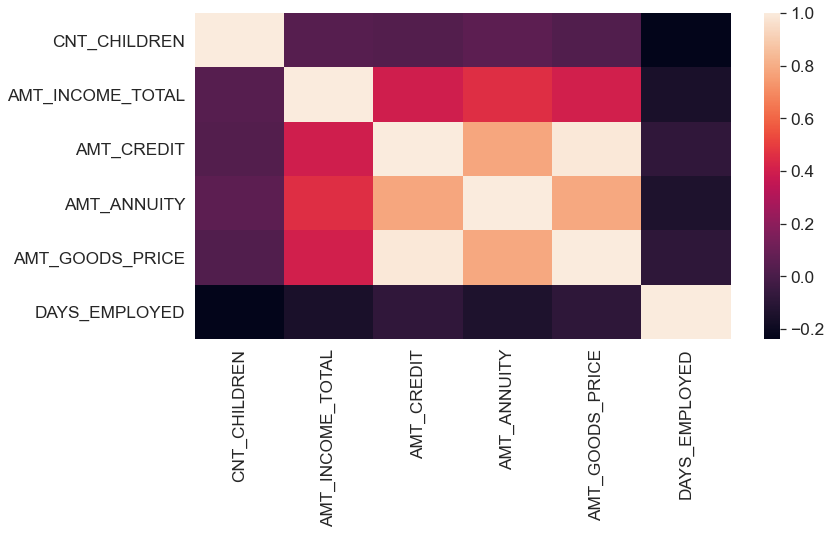

In [80]:
sns.heatmap(data_app_test[nums].corr())

In [99]:
#Checking table description
data_desc[data_desc.Row == 'FLAG_OWN_REALTY']['Description'][5]

'Flag if client owns a house or flat'

In [98]:
data_desc[data_desc.Row == 'NAME_HOUSING_TYPE']

,Unnamed: 0,Table,Row,Description,Special
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN


In [100]:
data_app_train.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [ ]:
label = ['TARGET']
features = ['NAME_CONTRACT_TYPE','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT',
           'NAME_EDUCATION_TYPE','']

In [63]:
#test function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))